**1. What is Ping Sweep?**

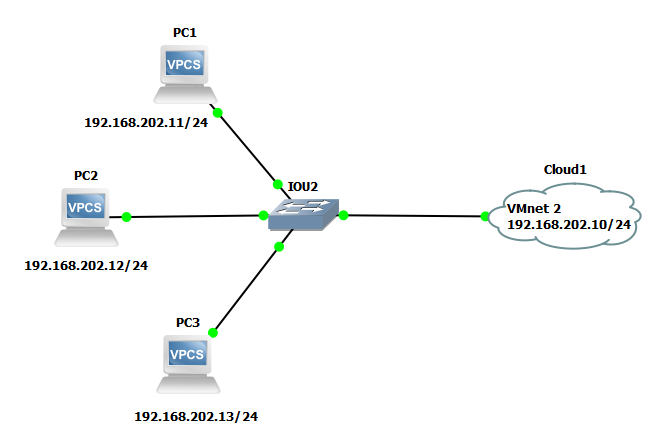

A ping sweep is a *network scanning technique* used to identify active devices (hosts) on a network. It involves sending ICMP (Internet Control Message Protocol) echo requests (commonly called "ping") to multiple IP addresses and analyzing the responses.

* Purpose: To determine which IP addresses are in use (active) on a specific network.
* How it works:
    * A ping request is sent to an IP address.
    * If the host at that IP address is active and reachable, it responds with an ICMP echo reply.
    * If no response is received, the host is considered inactive or unreachable.

**2. Why is Ping Sweep Important?**

* *Network Administration:* Helps administrators monitor and manage devices connected to their network.
* *Troubleshooting:* Identifies network connectivity issues.
* *Security:* Can detect unauthorized devices or rogue hosts.
* *Inventory:* Provides an overview of active devices and their IP addresses in a network.

**3. How is Ping Sweep Performed?**

* A ping sweep sends requests to a range of IP addresses, e.g., 192.168.1.1 to 192.168.1.254.
* Each request waits for a reply, which determines whether the IP address is active or inactive.

**4. Python Code**
Python scripts, like the one provided below, automate the process.

In [4]:
import os
import platform
import subprocess

def ping(host):
    """
    Returns True if host (str) responds to a ping request.
    """
    # Option for the number of packets as a function of
    param = '-n' if platform.system().lower() == 'windows' else '-c'
    # Building the command. Ex: "ping -c 1 192.168.202.1"
    command = ['ping', param, '1', host]
    # Redirecting output to devnull to avoid printing to the console
    return subprocess.call(command, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL) == 0

def ping_sweep(network):
    """
    Perform a ping sweep on the given network.
    """
    active_hosts = []
    for i in range(1, 15): # You can set 1 to 254 to check 
        ip = f"{network}.{i}"
        if ping(ip):
            print(f"{ip} is up")
            active_hosts.append(ip)
        else:
            print(f"{ip} is down")
    return active_hosts

if __name__ == "__main__":
    network = "192.168.202"
    active_hosts = ping_sweep(network)
    print("\nActive hosts:")
    for host in active_hosts:
        print(host)

192.168.202.1 is up
192.168.202.2 is down
192.168.202.3 is up
192.168.202.4 is down
192.168.202.5 is up
192.168.202.6 is down
192.168.202.7 is up
192.168.202.8 is down
192.168.202.9 is up
192.168.202.10 is up
192.168.202.11 is up
192.168.202.12 is up
192.168.202.13 is up
192.168.202.14 is down

Active hosts:
192.168.202.1
192.168.202.3
192.168.202.5
192.168.202.7
192.168.202.9
192.168.202.10
192.168.202.11
192.168.202.12
192.168.202.13
